# Intro to deep learning

## Defining our dataset

As a simple intro we want to make a network which can represent a basic linear function. We define the function: 
$$y = 3 x + 5$$
We sample the function with some added noise at 15 different inputs.

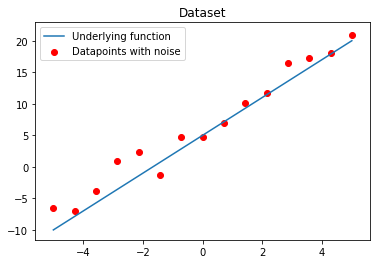

In [60]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)
x = np.linspace(-5, 5, 15)
y_gt = 3*x + 5 + np.random.normal(0,2,(15))
y_underlying = 3*x + 5
plt.plot(x, y_underlying, label = "Underlying function")
plt.scatter(x,y_gt, color = "red", label = "Datapoints with noise")
plt.title("Dataset")
plt.legend()
plt.show()

## Neuron and loss function
The simplest most basic element in a neural network is a single neuron. It takes an input $x$ and scales it by a weight $w$.

When training we pass the network output to a loss function which quantifies how far off the network is from the ground truth. In a regression task like this one the l2 norm is a common loss funtion. 

$$l_2 = (y_{gt} - y_{pred})^2$$

For the simple one-neuron case we can plot the loss function for all weight values. Since we only have one modifiable parameter the loss function will be of dimension 1.

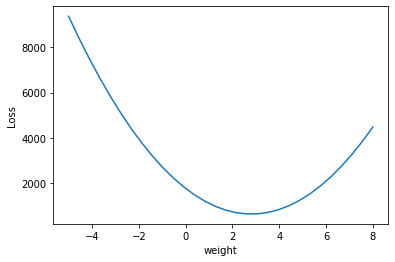

Minimum loss is 652.4071686869678, with weight: 2.6206896551724137


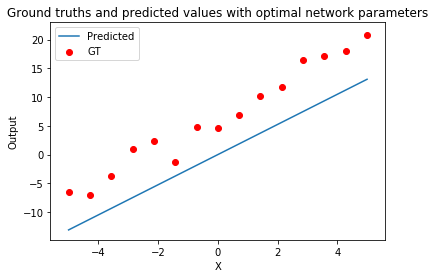

In [61]:
w = np.linspace(-5, 8, 30)

y_pred = w.reshape((-1, 1)) @ x.reshape((1, -1))

loss = np.sum((y_pred - y_gt)**2, axis=1)


plt.plot(w, loss)
plt.xlabel("weight")
plt.ylabel("Loss")
plt.show()


print(f"Minimum loss is {loss.min()}, with weight: {w[loss.argmin()]}")


plt.plot(x, w[loss.argmin()]*x, label = "Predicted")
plt.scatter(x,y_gt, color = "red", label = "GT")
plt.legend()
plt.xlabel("X")
plt.ylabel("Output")
plt.title("Ground truths and predicted values with optimal network parameters")
plt.show()

## Bias
As could be seen from the example over, the network did not represent the dataset well for any parameter values. That is because the one neuron network does not have the representation power to represent a linear function that doesn't cross the origin. 

One simple way to increase the network representation power is to include a bias. Now the neuron function works like this:
$$z = w x + b$$

The loss surface will be a 3d plot as we now have two modifiable parameters: weight and bias.

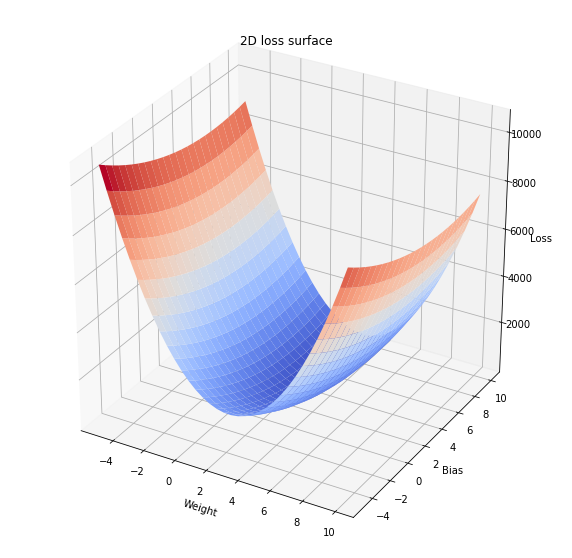

Minimal loss is 40.184379116556464 with weight: 2.9411764705882355, and bias 6.25


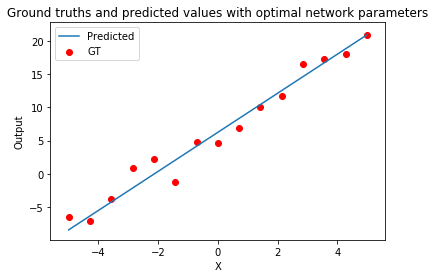

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
w = np.linspace(-5, 10, 35)
b = np.linspace(-5, 10, 25)

y_pred = w.reshape((-1, 1)) @ x.reshape((1, -1))

y_pred = y_pred.reshape((-1,x.size, 1)) + b.reshape(1, -1)
y_pred = y_pred.transpose(0,2,1)

loss = np.sum((y_pred - y_gt)**2, axis=2)

fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
B, W = np.meshgrid(b, w)

ax.plot_surface(W,B,loss, cmap = cm.coolwarm)
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Loss")
plt.title("2D loss surface")
plt.show()

w_idx, b_idx = np.unravel_index(np.argmin(loss, axis=None), loss.shape)

print(f"Minimal loss is {loss.min()} with weight: {w[w_idx]}, and bias {b[b_idx]}")

plt.plot(x, w[w_idx]*x + b[b_idx], label = "Predicted")
plt.scatter(x,y_gt, color = "red", label = "GT")
plt.legend()
plt.xlabel("X")
plt.ylabel("Output")
plt.title("Ground truths and predicted values with optimal network parameters")
plt.show()

## More complex functions
We now want to see how our network does on non-linear functions.

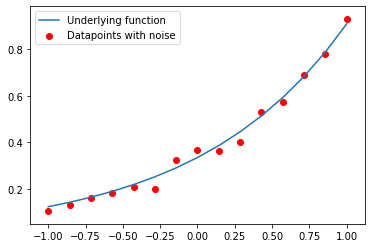

In [55]:
x = np.linspace(-1, 1, 15)
y_underlying = np.exp(x + 3) / 60
y_gt = y_underlying + np.random.normal(0, 0.03, (15))

plt.plot(x, y_underlying, label = "Underlying function")

plt.scatter(x, y_gt, color = "red", label = "Datapoints with noise")
plt.legend()
plt.show()

In order to represent non-linearities we must introduce non-linearities to our network. This is done by piping the weighted output from the previous step through a non-linear function.

$$y_{pred} = f(w x + b)$$

Try out the different activation functions and observe how the loss surface and predictions differ. Please note that not all of these functions are common, well suited deep learning functions. Some of them are there for pedagogical reasons.

In [131]:
from ipywidgets import interact_manual, widgets

def sigmoid_activation(z):
    return 1/(np.exp(-z)+1)

def tanh(z):
    return np.tanh(z)

def swish_activation(z):
    return z * sigmoid_activation(z)

def square_activation(z):
    return z**2

def ReLU(z):
    return np.maximum(0, z)

def identity(z):
    return z
def exponential_activation(z):
    return np.exp(z)


activation_functions = {"sigmoid" : sigmoid_activation,
                        "tanh" : tanh,
                        "swish" : swish_activation,
                        "square" : square_activation,
                        "ReLU" : ReLU,
                        "identity" : identity,
                        "exponential" : exponential_activation}
def test_activation_functions(activation_function):
    activation_function = activation_functions[activation_function]
    w = np.linspace(-100, 100, 1000)
    b = np.linspace(-100, 100, 1000)

    y_pred = w.reshape((-1, 1)) @ x.reshape((1, -1))

    y_pred = y_pred.reshape((-1,x.size, 1)) + b.reshape(1, -1)
    y_pred = y_pred.transpose(0,2,1)

    y_pred = activation_function(y_pred)
    loss = np.sum((y_pred - y_gt)**2, axis=2)
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d')
    B, W = np.meshgrid(b, w)

    ax.plot_surface(W,B,loss, cmap = cm.coolwarm)
    ax.set_xlabel("Weight")
    ax.set_ylabel("Bias")
    ax.set_zlabel("Loss")
    plt.title("2D loss surface")
    ax.view_init(30, 50)
    plt.show()

    w_idx, b_idx = np.unravel_index(np.argmin(loss, axis=None), loss.shape)

    print(f"Minimal loss is {loss.min()} with weight: {w[w_idx]}, and bias {b[b_idx]}")
    y_pred = w[w_idx]*x + b[b_idx]
    y_pred = activation_function(y_pred)

    plt.plot(x, y_pred, label = "Predicted")
    plt.scatter(x,y_gt, color = "red", label = "GT")
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Output")
    plt.title("Ground truths and predicted values with optimal network parameters")
    plt.show()
    
    
_ = interact_manual(test_activation_functions, activation_function = activation_functions.keys())

interactive(children=(Dropdown(description='activation_function', options=('sigmoid', 'tanh', 'swish', 'square…

## Cost functions

In addition to modifying the activation function we may modify the cost-function as well. The cost-function is the part of the network that quantifies how wrong the network is in its predictions.

Untill now we have used the l2 norm. L2 norm considers the square difference between the ground truths and the predictions. This is usually a good mesure, but it performs worse when there are outliers in the dataset. An alternative then is the L1 function:

$$L_1 = |y_{gt} - y_{pred}|$$

### Define dataset with outliers

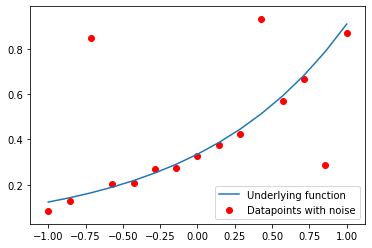

In [163]:

class Dataset():
    def __init__(self, noise_std, include_outliers):
        self.std = noise_std
        self.outliers = include_outliers
        self.make_dataset()
        self.visualize()
        
    def make_dataset(self): 
        self.x = np.linspace(-1, 1, 15)
        self.y_underlying = np.exp(self.x + 3) / 60
        self.y_gt = self.y_underlying + np.random.normal(0, self.std, (15))

        if self.outliers:
            self.y_gt[2] += 0.7
            self.y_gt[13] -= 0.5
            self.y_gt[10] += 0.4
    
    def refresh_dataset(self, noise_std, include_outliers):
        if noise_std != self.std or include_outliers != self.outliers:
            self.std = noise_std
            self.outliers = include_outliers
            self.make_dataset()
        return self.x, self.y_gt, self.y_underlying
    
    def visualize(self):
        plt.plot(self.x, self.y_underlying, label = "Underlying function")

        plt.scatter(self.x, self.y_gt, color = "red", label = "Datapoints with noise")
        plt.legend()
        plt.show()

dataset = Dataset(0.03, True)

### L2 vs L1 with outliers in dataset
Try out L2 and L1 with different outliers in the dataset. Observe that with most of the activation functions L1 more closely represents the true function, ignoring the outliers. L2 on the other hand tries to fit the function to the outliers as well, leading to an overall worse representation.

In [175]:
def l1_loss(y_pred, y_gt):
    return np.abs(y_pred - y_gt)

def l2_loss(y_pred, y_gt):
    return (y_pred - y_gt)**2


loss_functions = {"L2" : l2_loss,
                  "L1" : l1_loss}

activation_functions = {"sigmoid" : sigmoid_activation,
                        "square" : square_activation,
                        "exponential" : exponential_activation,
                        "identity" : identity,}
def test_loss_functions(loss, activation_function, noise, include_outliers, plot_rot):
    x, y_gt, y_underlying = dataset.refresh_dataset(noise, include_outliers)
    loss_function = loss_functions[loss]
    activation_function = activation_functions[activation_function]
    w = np.linspace(-5, 5, 20)
    b = np.linspace(-5, 5, 20)

    y_pred = w.reshape((-1, 1)) @ x.reshape((1, -1))

    y_pred = y_pred.reshape((-1,x.size, 1)) + b.reshape(1, -1)
    y_pred = y_pred.transpose(0,2,1)

    y_pred = activation_function(y_pred)
    loss = np.sum(loss_function(y_pred, y_gt), axis=2)
    
    fig = plt.figure(figsize = (20,10))
    
    ax = fig.add_subplot(1,2,1, projection='3d')
    B, W = np.meshgrid(b, w)
    #ax.plot_wireframe(W,B,loss, cmap = cm.coolwarm)
    ax.plot_surface(W,B,loss, cmap = cm.coolwarm)
    
    ax.set_xlabel("Weight")
    ax.set_ylabel("Bias")
    ax.set_zlabel("Loss")
    plt.title("2D loss surface")
    ax.view_init(30, plot_rot)

    w_idx, b_idx = np.unravel_index(np.argmin(loss, axis=None), loss.shape)

    print(f"Minimal loss is {loss.min()} with weight: {w[w_idx]}, and bias {b[b_idx]}")
    y_pred = w[w_idx]*x + b[b_idx]
    y_pred = activation_function(y_pred)
    
    plt.subplot(1,2,2)
    plt.plot(x, y_pred, label = "Predicted")
    plt.plot(x, y_underlying, label = "True function")
    plt.scatter(x,y_gt, color = "red", label = "GT")
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Output")
    plt.title("Ground truths and predicted values with optimal network parameters")
    plt.show()
    
    
_ = interact_manual(test_loss_functions, loss = loss_functions.keys(), activation_function = activation_functions.keys(),
                   noise = widgets.fixed(0.03), include_outliers = widgets.fixed(True),
                   plot_rot = widgets.IntSlider(min = 0, max = 90, value = 50))

interactive(children=(Dropdown(description='loss', options=('L2', 'L1'), value='L2'), Dropdown(description='ac…

### Test different loss functions

Now we define some more loss functions. Try out the different combinations and observe the loss surface and network output at different levels of noise. Which combination of activation and loss function represents the true function best with and without noise? A good place to start is with the exponential activation function.


In [173]:


def poissonNLLLoss(y_pred, y_gt):
    return y_pred - y_gt*np.log(y_pred + 1.0e-8)

def smoothL1(y_pred, y_gt):
    return np.where(np.abs(y_pred-y_gt)< 1., 0.5*(y_pred - y_gt)**2 ,np.abs(y_pred-y_gt) - 0.5)


def normal_distribution_loss(y_pred, y_gt, sigma = 1.0):
    '''
    Returns 1 minus the likelihood of drawing your predicted value from a normal
    distribution with mean = y_gt
    '''
    prob = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5 * ((y_pred - y_gt)/sigma)**2)
    return 1 -prob

loss_functions = {"L2" : l2_loss,
                  "L1" : l1_loss,
                  "Smooth L1" : smoothL1,
                  "Poisson negative log likelihood" : poissonNLLLoss,
                  "Normal distribution loss" : normal_distribution_loss}


    
    
_ = interact_manual(test_loss_functions, loss = loss_functions.keys(), activation_function = activation_functions.keys(),
                   noise = widgets.FloatSlider(min = 0.0, max = 0.5, value = 0.03), include_outliers = widgets.fixed(False),
                   plot_rot = widgets.IntSlider(min = -90, max = 90, value = 50))

interactive(children=(Dropdown(description='loss', options=('L2', 'L1', 'Smooth L1', 'Poisson negative log lik…